### **Рабочая тетрадь №6**


1.1.1 Пример
Задача:
Пусть дана начальная популяция из четырех хромосом с двумя
генами x и y. Показатель качества хромосомы оценивается функцией Z.
При равном качестве хромосом предпочтение отдается хромосоме с
большим номером. На каждом этапе хромосома a с высшим качеством
порождает четыре новых хромосомы 𝑏1, 𝑐1, 𝑏2, 𝑐2, обмениваясь генами с
двумя хромосомами b и c более низкого качества по указанной схеме:
Последняя хромоcома (с низшим качеством) выбывает из
популяции. Найти максимальный показатель качества хромосомы в
популяции и общее качество популяции после четырех этапов эволюции.
Потребуется несколько функций для реализации алгоритма. Напишем их.

In [ ]:
#функция качества хромосомы
def qZ(x,y):
  return (x - 3 * y + 1) / (3 * x ** 2 + 3 * y ** 2 + 1)

def qSumZ(Z):
  return sum(Z)

def exchangeScheme(oldX, oldY, sortedId):
  x = [0 for i in range(4)]
  y = [0 for i in range(4)]
  x[2] = oldX[sortedId[2]]
  x[3] = oldX[sortedId[2]]

  x[0] = oldX[sortedId[0]]

  x[1] = oldX[sortedId[1]]

  y[0] = oldX[sortedId[2]]
  y[1] = oldX[sortedId[2]]

  y[2] = oldX[sortedId[0]]

  y[3] = oldX[sortedId[1]]

  return x, y

def sorting(Z):
  sortedId = sorted(range(len(Z)), key = lambda k: Z[k])
  return sortedId

#шаг эволюции
def evoStep(x,y,z):
  _, minId = min((value, id) for (id, value) in enumerate(z))
  x = x[:]
  y = y[:]
  z = z[:]

  x.pop(minId)
  y.pop(minId)
  z.pop(minId)
  return x,y,z
#шаги эволюции (конечная функция), по уполчанию 4 шага
def evoSteps(x,y,stepsNum = 4):
  results = []
  for i in range(4):
    arrZ = [qZ(x,y[i]) for i, x in enumerate(x)]
    x,y,z = evoStep(x,y,arrZ)
    x,y = exchangeScheme(x,y,sorting(z))
    results.append([x,y, qSumZ(arrZ), arrZ])
  return x,y,results

x = [-2, -1, 0, 1]
y = [-2, -1, 0, 1]
results = evoSteps(x,y)

for i in range(len(results[2])):
  print(f'max_{i + 1}_steps: {results[2][i][2]}')

qualityArrZ = []
for i in range(len(results[2])):
  qualityArrZ += results[2][i][3]
print(f'max Z:       {max(qualityArrZ)}')


max_1_steps: 1.4857142857142858
max_2_steps: 1.4615384615384615
max_3_steps: 3.0
max_4_steps: 4.0
max Z:       1.0


Задание:
Выполните по вариантам соответственно реализацию генетического
алгоритма в соответствии с приложенными начальными данными.

**3 вариант**

In [ ]:
#функция качества хромосомы
def qZ(x,y):
  return (x - 3 * y - 2) / (x**2 + y**2 + 1)

def qSumZ(Z):
  return sum(Z)

def exchangeScheme(oldX, oldY, sortedId):
  x = [0 for i in range(4)]
  y = [0 for i in range(4)]
  x[2] = oldX[sortedId[2]]
  x[3] = oldX[sortedId[2]]

  x[0] = oldX[sortedId[0]]

  x[1] = oldX[sortedId[1]]

  y[0] = oldX[sortedId[2]]
  y[1] = oldX[sortedId[2]]

  y[2] = oldX[sortedId[0]]

  y[3] = oldX[sortedId[1]]

  return x, y

def sorting(Z):
  sortedId = sorted(range(len(Z)), key = lambda k: Z[k])
  return sortedId

#шаг эволюции
def evoStep(x,y,z):
  _, minId = min((value, id) for (id, value) in enumerate(z))
  x = x[:]
  y = y[:]
  z = z[:]

  x.pop(minId)
  y.pop(minId)
  z.pop(minId)
  return x,y,z
#шаги эволюции (конечная функция), по уполчанию 4 шага
def evoSteps(x,y,stepsNum = 4):
  results = []
  for i in range(4):
    arrZ = [qZ(x,y[i]) for i, x in enumerate(x)]
    x,y,z = evoStep(x,y,arrZ)
    x,y = exchangeScheme(x,y,sorting(z))
    results.append([x,y, qSumZ(arrZ), arrZ])
  return x,y,results

x = [-1, 0, 2, 3]
y = [-2, 1, 0, -1]
results = evoSteps(x,y)

for i in range(len(results[2])):
  print(f'max_{i + 1}_steps: {results[2][i][2]}')

qualityArrZ = []
for i in range(len(results[2])):
  qualityArrZ += results[2][i][3]
print(f'max Z:       {max(qualityArrZ)}')


max_1_steps: -1.6363636363636362
max_2_steps: -1.727272727272727
max_3_steps: -2.0
max_4_steps: -2.333333333333333
max Z:       0.5


1.2.1 Пример
Задача:
Итак, начальные условия задачи представляют собой следующий граф с
расстояниями между ребрами:

Лучший выбранный маршрут: [1, 6, 2, 3, 4, 5, 1]
Длина лучшего выбранного маршрута: 146
Длины всех рассмотренных маршрутов: [189, 209, 186, 146, 166]


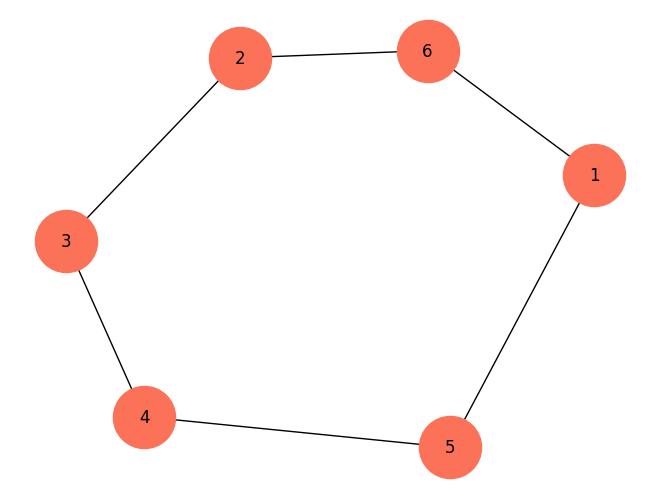

In [ ]:
import networkx as nx
from math import e
distances = [(1, 2, 20),
            (1, 3, 40),
            (1, 4, 42),
            (1, 5, 33),
            (1, 6, 21),
            (2, 3, 26),
            (2, 4, 38),
            (2, 5, 42),
            (2, 6, 17),
            (3, 4, 22),
            (3, 5, 43),
            (3, 6, 21),
            (4, 5, 27),
            (4, 6, 22),
            (5, 6, 26)] # длины рёбер
V = [1, 4, 5, 2, 6, 3, 1] # последовательность прохождения маршрута
Z = [(3, 4),
    (4, 6),
    (5, 2),
    (6, 2)] # последовательность замен Вершин
P = [49, 54, 43, 54] # случайные числа, быпавшие в процессе счёта
T = 100 # начальная температура

#функция вероятности
def probability(delta, T):
  return 100 * e ** (-delta / T)

#функция изменения температуры
def reductTemp(prevT):
  return 0.5 * prevT

graph = nx.Graph()
graph.add_weighted_edges_from(distances)
#отрисовка графа
#nx.draw_kamada_kawai(graph, node_color = '#fb7258', node_size = 2000, with_labels = True)

#вычисление длины ребра
def edgeLength(i, j, distances, roundTrip = True):
  if roundTrip:
    return max([(item[2] if (item[0] == i and item[1] == j) or (item[1] == i and item[0] == j) else -1)
                for item in distances])
  else:
    return max([(item[2] if (item[0] == i and item[1] == j) else -1) for item in distances])

 #вычисление длины маршрута
def routeLength(v, distances):
  edges = []
  for i in range(len(v) - 1):
    edges.append(edgeLength(v[i], v[i+1], distances))

  return sum(edges)

#одна перестановка в пути
def routeOneReplacement(arrV, z, replacementByName = True):
  decrement = 1 if replacementByName else 0
  arrV[z[0] - decrement], arrV[z[1] - decrement] = arrV[z[1] - decrement], arrV[z[0] - decrement]
  return arrV

#перестановка в пути
def routeReplacement(V,Z):
  for z in Z:
    V = routeOneReplacement(V,z)
  return V

#выбор нужного пути методом отжига
def chooseRoute(distances, V, Z, T, P):
  sumLength = routeLength(V, distances) # нахождение длины пути
  arrSum = [sumLength] # массив сумм длин
  # циклы методом отжига
  for i in range(len(Z)):
    newV = routeOneReplacement(V[:], Z[i]) # новый маршрут после перестановки
    newS = routeLength(newV, distances) # Длина нового маршрута
    arrSum.append (newS)
    deltas = newS - sumLength # разница между длиной нового и старого маршрутов # в случае, если разница между длинами больше 0, то вычисляется вероятность
    if deltas > 0:
      p = probability(deltas, T) # подсчёт вероятности
      # если заданная Вероятность попадает 6 интервал от в до р, то новый маршрут Выбирается
      if p > P[i]:
        V = newV
        sumLength = newS
    else:
      V = newV
      sumLength = newS
    T = reductTemp(T) # Вычисление температуры
  return V, arrSum

# отрисовка графа по заданному маршруту
def drawRouteGraph(distances, bestRoute):
  newDistances = []
  # прохождение по вектору
  for i in range(len(bestRoute) - 1):
    for distance in distances:
      if distance[0] == bestRoute[i] and distance[1] == bestRoute[i + 1] or distance[1] == bestRoute[i] and distance [0] == bestRoute[i + 1]:
        newDistances.append(distance)
  graph = nx.Graph() # создание пустого графа
  graph. add_weighted_edges_from(newDistances) # добавление весов рёбер
  # отрисовка графа с заданными вершинами
  nx.draw_kamada_kawai(graph, node_color = '#fb7258', node_size = 2000, with_labels = True)

bestRoute, arrLength = chooseRoute(distances, V, Z, T, P)
print(f'Лучший выбранный маршрут: {bestRoute}')
print(f'Длина лучшего выбранного маршрута: {routeLength(bestRoute, distances)}')
print(f'Длины всех рассмотренных маршрутов: {arrLength}')
drawRouteGraph(distances, bestRoute) # отрисовка лучшего маршрута

Задание
Найти длину гамильтонова цикла S4 в полном графе K6 после четырех
циклов решения задачи методом отжига по вариантам ниже.

**3 вариант**

Лучший выбранный маршрут: [1, 5, 4, 3, 2, 6, 1]
Длина лучшего выбранного маршрута: 128
Длины всех рассмотренных маршрутов: [148, 162, 155, 142, 128]


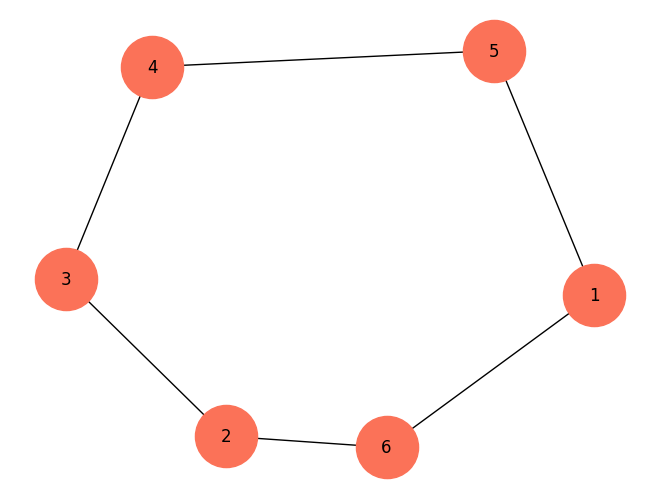

In [2]:
import networkx as nx
from math import e
distances = [(1, 2, 23),
            (1, 3, 42),
            (1, 4, 40),
            (1, 5, 25),
            (1, 6, 22),
            (2, 3, 20),
            (2, 4, 30),
            (2, 5, 34),
            (2, 6, 13),
            (3, 4, 22),
            (3, 5, 41),
            (3, 6, 21),
            (4, 5, 26),
            (4, 6, 19),
            (5, 6, 22)] # длины рёбер
V = [1, 3, 4, 5, 6, 2, 1] # последовательность прохождения маршрута
Z = [(4, 5),
    (5, 6),
    (2, 4),
    (6, 2)] # последовательность замен Вершин
P = [78, 24, 63, 17] # случайные числа, быпавшие в процессе счёта
T = 100 # начальная температура

#функция вероятности
def probability(delta, T):
  return 100 * e ** (-delta / T)

#функция изменения температуры
def reductTemp(prevT):
  return 0.5 * prevT

graph = nx.Graph()
graph.add_weighted_edges_from(distances)
#отрисовка графа
#nx.draw_kamada_kawai(graph, node_color = '#fb7258', node_size = 2000, with_labels = True)

#вычисление длины ребра
def edgeLength(i, j, distances, roundTrip = True):
  if roundTrip:
    return max([(item[2] if (item[0] == i and item[1] == j) or (item[1] == i and item[0] == j) else -1)
                for item in distances])
  else:
    return max([(item[2] if (item[0] == i and item[1] == j) else -1) for item in distances])

 #вычисление длины маршрута
def routeLength(v, distances):
  edges = []
  for i in range(len(v) - 1):
    edges.append(edgeLength(v[i], v[i+1], distances))

  return sum(edges)

#одна перестановка в пути
def routeOneReplacement(arrV, z, replacementByName = True):
  decrement = 1 if replacementByName else 0
  arrV[z[0] - decrement], arrV[z[1] - decrement] = arrV[z[1] - decrement], arrV[z[0] - decrement]
  return arrV

#перестановка в пути
def routeReplacement(V,Z):
  for z in Z:
    V = routeOneReplacement(V,z)
  return V

#выбор нужного пути методом отжига
def chooseRoute(distances, V, Z, T, P):
  sumLength = routeLength(V, distances) # нахождение длины пути
  arrSum = [sumLength] # массив сумм длин
  # циклы методом отжига
  for i in range(len(Z)):
    newV = routeOneReplacement(V[:], Z[i]) # новый маршрут после перестановки
    newS = routeLength(newV, distances) # Длина нового маршрута
    arrSum.append(newS)
    deltas = newS - sumLength # разница между длиной нового и старого маршрутов
    # в случае, если разница между длинами больше 0, то вычисляется вероятность
    if deltas > 0:
      p = probability(deltas, T) # подсчёт вероятности
      # если заданная Вероятность попадает 6 интервал от в до р, то новый маршрут Выбирается
      if p > P[i]:
        V = newV
        sumLength = newS
    else:
      V = newV
      sumLength = newS
    T = reductTemp(T) # Вычисление температуры
  return V, arrSum

# отрисовка графа по заданному маршруту
def drawRouteGraph(distances, bestRoute):
  newDistances = []
  # прохождение по вектору
  for i in range(len(bestRoute) - 1):
    for distance in distances:
      if distance[0] == bestRoute[i] and distance[1] == bestRoute[i + 1] or distance[1] == bestRoute[i] and distance [0] == bestRoute[i + 1]:
        newDistances.append(distance)
  graph = nx.Graph() # создание пустого графа
  graph. add_weighted_edges_from(newDistances) # добавление весов рёбер
  # отрисовка графа с заданными вершинами
  nx.draw_kamada_kawai(graph, node_color = '#fb7258', node_size = 2000, with_labels = True)

bestRoute, arrLength = chooseRoute(distances, V, Z, T, P)
print(f'Лучший выбранный маршрут: {bestRoute}')
print(f'Длина лучшего выбранного маршрута: {routeLength(bestRoute, distances)}')
print(f'Длины всех рассмотренных маршрутов: {arrLength}')
drawRouteGraph(distances, bestRoute) # отрисовка лучшего маршрута

Задание*:
На решенном уже примере поэкспериментируйте с показателем S,
проанализируйте результаты.

Лучший выбранный маршрут: [1, 3, 4, 6, 2, 5, 1]
Длина лучшего выбранного маршрута: 155
Длины всех рассмотренных маршрутов: [148, 162, 155]


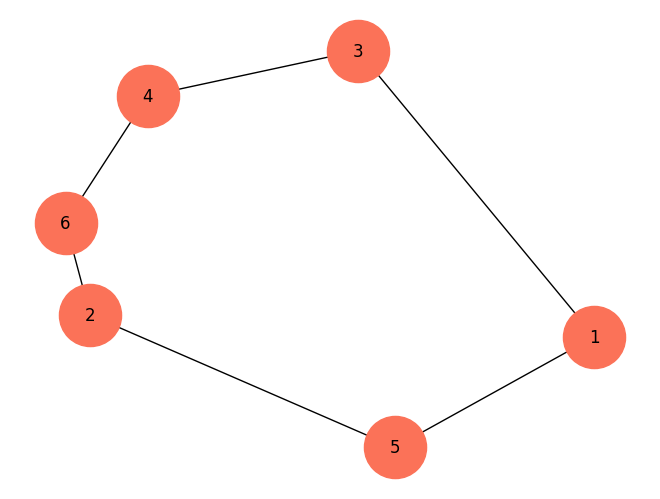

In [4]:
import networkx as nx
from math import e
distances = [(1, 2, 23),
            (1, 3, 42),
            (1, 4, 40),
            (1, 5, 25),
            (1, 6, 22),
            (2, 3, 20),
            (2, 4, 30),
            (2, 5, 34),
            (2, 6, 13),
            (3, 4, 22),
            (3, 5, 41),
            (3, 6, 21),
            (4, 5, 26),
            (4, 6, 19),
            (5, 6, 22)] # длины рёбер
V = [1, 3, 4, 5, 6, 2, 1] # последовательность прохождения маршрута
Z = [(4, 5),
    (5, 6),
    (2, 4),
    (6, 2)] # последовательность замен Вершин
P = [78, 24, 63, 17] # случайные числа, быпавшие в процессе счёта
T = 100 # начальная температура

#функция вероятности
def probability(delta, T):
  return 100 * e ** (-delta / T)

#функция изменения температуры
def reductTemp(prevT):
  return 0.5 * prevT

graph = nx.Graph()
graph.add_weighted_edges_from(distances)
#отрисовка графа
#nx.draw_kamada_kawai(graph, node_color = '#fb7258', node_size = 2000, with_labels = True)

#вычисление длины ребра
def edgeLength(i, j, distances, roundTrip = True):
  if roundTrip:
    return max([(item[2] if (item[0] == i and item[1] == j) or (item[1] == i and item[0] == j) else -1)
                for item in distances])
  else:
    return max([(item[2] if (item[0] == i and item[1] == j) else -1) for item in distances])

 #вычисление длины маршрута
def routeLength(v, distances):
  edges = []
  for i in range(len(v) - 1):
    edges.append(edgeLength(v[i], v[i+1], distances))

  return sum(edges)

#одна перестановка в пути
def routeOneReplacement(arrV, z, replacementByName = True):
  decrement = 1 if replacementByName else 0
  arrV[z[0] - decrement], arrV[z[1] - decrement] = arrV[z[1] - decrement], arrV[z[0] - decrement]
  return arrV

#перестановка в пути
def routeReplacement(V,Z):
  for z in Z:
    V = routeOneReplacement(V,z)
  return V

#выбор нужного пути методом отжига
def chooseRoute(distances, V, Z, T, P):
  sumLength = routeLength(V, distances) # нахождение длины пути
  arrSum = [sumLength] # массив сумм длин
  num_rout = 0
  # циклы методом отжига
  for i in range(len(Z)):
    if num_rout > 1:
      break
    newV = routeOneReplacement(V[:], Z[i]) # новый маршрут после перестановки
    newS = routeLength(newV, distances) # Длина нового маршрута
    arrSum.append(newS)
    deltas = newS - sumLength # разница между длиной нового и старого маршрутов
    # в случае, если разница между длинами больше 0, то вычисляется вероятность
    if deltas > 0:
      p = probability(deltas, T) # подсчёт вероятности
      # если заданная Вероятность попадает 6 интервал от в до р, то новый маршрут Выбирается
      if p > P[i]:
        V = newV
        sumLength = newS
    else:
      V = newV
      sumLength = newS
    T = reductTemp(T) # Вычисление температуры
    num_rout += 1
  return V, arrSum

# отрисовка графа по заданному маршруту
def drawRouteGraph(distances, bestRoute):
  newDistances = []
  # прохождение по вектору
  for i in range(len(bestRoute) - 1):
    for distance in distances:
      if distance[0] == bestRoute[i] and distance[1] == bestRoute[i + 1] or distance[1] == bestRoute[i] and distance [0] == bestRoute[i + 1]:
        newDistances.append(distance)
  graph = nx.Graph() # создание пустого графа
  graph. add_weighted_edges_from(newDistances) # добавление весов рёбер
  # отрисовка графа с заданными вершинами
  nx.draw_kamada_kawai(graph, node_color = '#fb7258', node_size = 2000, with_labels = True)

bestRoute, arrLength = chooseRoute(distances, V, Z, T, P)
print(f'Лучший выбранный маршрут: {bestRoute}')
print(f'Длина лучшего выбранного маршрута: {routeLength(bestRoute, distances)}')
print(f'Длины всех рассмотренных маршрутов: {arrLength}')
drawRouteGraph(distances, bestRoute) # отрисовка лучшего маршрута